# Data analysis of the 1st experiment

In this experiment, we trained the models and calculated the accuracy, precision, sensitivity and f1-score of both models. We collect these metrics to verify that the classification performs well with both packages. We performed the training thirty times and collected the thirty samples of each metric.

In [1]:
import numpy as np
import scipy.stats as st

from sklearn.metrics import ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# filtering messages to error
import warnings

warnings.filterwarnings('ignore')

## Utils

In [3]:
def read_file(filename):
    tmp = list()
    with open(filename) as f:
        for line in f:
            tmp.append(float(line.rstrip()))
    return tmp

In [4]:
def read_matrices(filename):
    tp = list()
    fp = list()
    fn = list()
    tn = list()
    
    with open(filename) as f:
        for line in f:
            val = [float(v) for v in line.rstrip().split(' ')]
            tp.append(val[0])
            fp.append(val[1])
            fn.append(val[2])
            tn.append(val[3])
    
    tp_mean = np.mean(tp)
    tp_lower, tp_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=tp_mean, scale=st.sem(data))
    
    fp_mean = np.mean(fp)
    fp_lower, fp_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=fp_mean, scale=st.sem(data))
    
    fn_mean = np.mean(fn)
    fn_lower, fn_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=fn_mean, scale=st.sem(data))
     
    tn_mean = np.mean(tn)
    tn_lower, tn_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=tn_mean, scale=st.sem(data))

    
    mean_matrix = [[tp_mean, fp_mean], [fn_mean, tn_mean]]
    lower_matrix = [[tp_lower, fp_lower], [fn_lower, tn_lower]] 
    upper_matrix = [[tp_upper, fp_upper], [fn_upper, tn_upper]]
    
    return mean_matrix, lower_matrix, upper_matrix

## Tensorflow Metrics

In [5]:
data = read_file(f'results/accs.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= accs =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= accs =

lower: 0.960
mean: 0.969
upper: 0.977


In [6]:
data = read_file(f'results/times.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= times =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= times =

lower: 5.234
mean: 5.399
upper: 5.564


In [7]:
data = read_file(f'results/precisions.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= precisions =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= precisions =

lower: 0.956
mean: 0.972
upper: 0.988


In [8]:
data = read_file(f'results/recalls.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= recalls =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= recalls =

lower: 0.955
mean: 0.968
upper: 0.981


In [9]:
data = read_file(f'results/f1s.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= f1s =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= f1s =

lower: 0.961
mean: 0.969
upper: 0.977


In [10]:
mean_matrix, lower_matrix, upper_matrix = read_matrices('results/cms.txt')

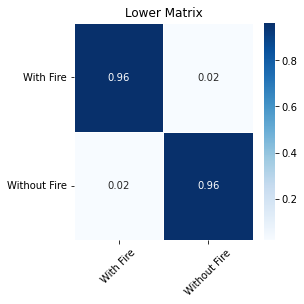

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Lower Matrix')
ax = sns.heatmap(lower_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

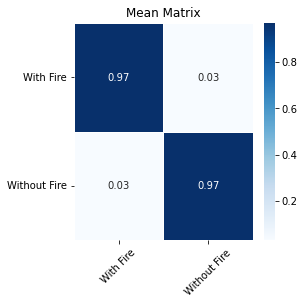

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Mean Matrix')
ax = sns.heatmap(mean_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# plt.show()
plt.savefig('tf_mean_matrix.png', bbox_inches='tight', dpi=1200)

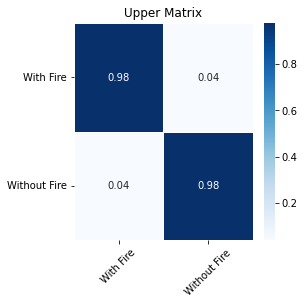

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Upper Matrix')
ax = sns.heatmap(upper_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

## Tensorflow Lite Metrics

In [14]:
data = read_file(f'results/accs.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= accs =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= accs =

lower: 0.960
mean: 0.969
upper: 0.977


In [15]:
data = read_file(f'results/tflite-times.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= times =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= times =

lower: 0.607
mean: 0.613
upper: 0.620


In [16]:
data = read_file(f'results/tflite-precisions.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= precisions =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= precisions =

lower: 0.956
mean: 0.972
upper: 0.988


In [17]:
data = read_file(f'results/tflite-recalls.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= recalls =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= recalls =

lower: 0.955
mean: 0.968
upper: 0.981


In [18]:
data = read_file(f'results/tflite-f1s.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= f1s =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= f1s =

lower: 0.961
mean: 0.969
upper: 0.977


In [19]:
mean_matrix, lower_matrix, upper_matrix = read_matrices('results/tflite-cms.txt')

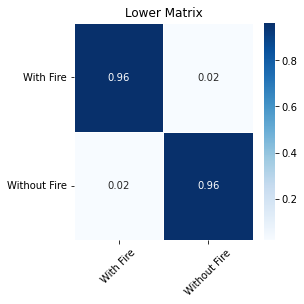

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Lower Matrix')
ax = sns.heatmap(lower_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

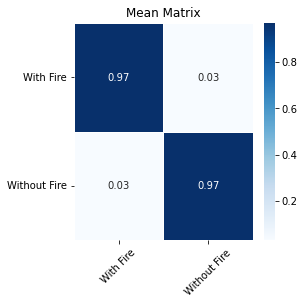

In [21]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Mean Matrix')
ax = sns.heatmap(mean_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# plt.show()
plt.savefig('tflite_mean_matrix.png', bbox_inches='tight', dpi=1200)

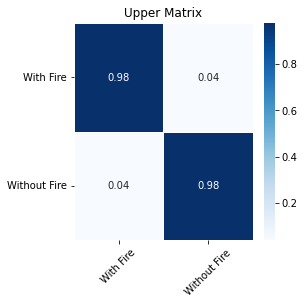

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Upper Matrix')
ax = sns.heatmap(upper_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()